Month

In [280]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [383]:
##2020-23year 
xlsx21 = pd.ExcelFile("NPS TD + Diss reasons Dec'21.xlsx")
df21 = pd.read_excel(xlsx21,'Dissatisfied reasons')
df22 = pd.read_excel('NPS TD + Diss reasons Dec\'22.xlsx') 
df23 = pd.read_excel('NPS + Diss reasons + Sat reasons Mar\'23.xlsx')
#df20['Категория_Выбор'].value_counts()
#df20['Вариант'].unique()
###
cat = 'Total Russia all w/o Moscow'
var = 'Навязчивые звонки от оператора с предложением сменить тариф/ подключить услугу'
df21 = df21.query('Категория_Выбор not in (@cat) & Вариант ==@var')
df22 = df22.query('Категория_Выбор not in (@cat) & Вариант ==@var')
df23 = df23.query('Категория_Выбор not in (@cat) & Вариант ==@var')
###
df20_21 = pd.melt(df21, id_vars = ['Показатель', 'Оператор', 'Вариант', 'Категория_Выбор'], 
                        value_vars=['Jan\'20', 'Feb\'20', 'Mar\'20', 'Apr\'20', 'May\'20', 'Jun\'20', 'Jul\'20', 'Aug\'20' ,
                                    'Sep\'20', 'Oct\'20', 'Nov\'20', 'Dec\'20','Jan\'21', 'Feb\'21', 'Mar\'21',
                                    'Apr\'21', 'May\'21', 'Jun\'21', 'Jul\'21', 'Aug\'21', 'Sep\'21', 'Oct\'21',
                                    'Nov\'21', 'Dec\'21']).rename(columns={'variable':'Month', 'value':'Share'})
##2022year
#df22.columns
df22 =pd.melt(df22, id_vars =['Показатель', 'Оператор', 'Вариант', 'Категория_Выбор'], 
                    value_vars=['Jan\'22'], var_name='Month', value_name='Share')

#2023
df23.rename(columns = {"Oct'22\n(A)": "Oct'22", "Nov'22\n(B)": "Nov'22",
                        "Dec'22\n(C)": "Dec'22","Jan'23\n(D)": "Jan'23",
                        "Feb'23\n(E)": "Feb'23","Mar'23\n(F)": "Mar'23"}, inplace=True)

df23 =  pd.melt(df23, id_vars=['Показатель', 'Оператор', 'Вариант', 'Категория_Выбор'], 
                      value_vars=['Feb\'22', 'Mar\'22', 'Apr\'22', 'May\'22', 'Jun\'22', 'Jul\'22',
                                  'Aug\'22', 'Sep\'22', 'Oct\'22', 'Nov\'22', 'Dec\'22', 'Jan\'23', 'Feb\'23',
                                  'Mar\'23'], var_name='Month', value_name="Share")

df = pd.concat([df20_21, df22, df23])
##replace date
df['new_month'] = "01-"+ df['Month']
df['new_month'] = df['new_month'].str.replace("\'", "-")
df['new_month'] = pd.to_datetime(df['new_month']).dt.date
##replace
dic = {'Dissatisfied Reasons (NET)':'Dissatisfied reasons'}
df['Показатель']= df['Показатель'].replace(dic)
df


,Показатель,Оператор,Вариант,Категория_Выбор,Month,Share,new_month
0,Dissatisfied reasons,МТС,Навязчивые звонки от оператора с предложением ...,Moscow,Jan'20,0.000000,2020-01-01
1,Dissatisfied reasons,Билайн,Навязчивые звонки от оператора с предложением ...,Moscow,Jan'20,0.000000,2020-01-01
2,Dissatisfied reasons,Мегафон,Навязчивые звонки от оператора с предложением ...,Moscow,Jan'20,0.000000,2020-01-01
3,Dissatisfied reasons,Tele2,Навязчивые звонки от оператора с предложением ...,Moscow,Jan'20,0.000000,2020-01-01
4,Dissatisfied reasons,МТС,Навязчивые звонки от оператора с предложением ...,Total Russia all,Jan'20,0.000000,2020-01-01
...,...,...,...,...,...,...,...
107,Dissatisfied reasons,Tele2,Навязчивые звонки от оператора с предложением ...,Total Russia all,Mar'23,0.204380,2023-03-01
108,Dissatisfied reasons,МТС,Навязчивые звонки от оператора с предложением ...,Moscow,Mar'23,0.110493,2023-03-01
109,Dissatisfied reasons,Билайн,Навязчивые звонки от оператора с предложением ...,Moscow,Mar'23,0.110917,2023-03-01
110,Dissatisfied reasons,Мегафон,Навязчивые звонки от оператора с предложением ...,Moscow,Mar'23,0.205513,2023-03-01


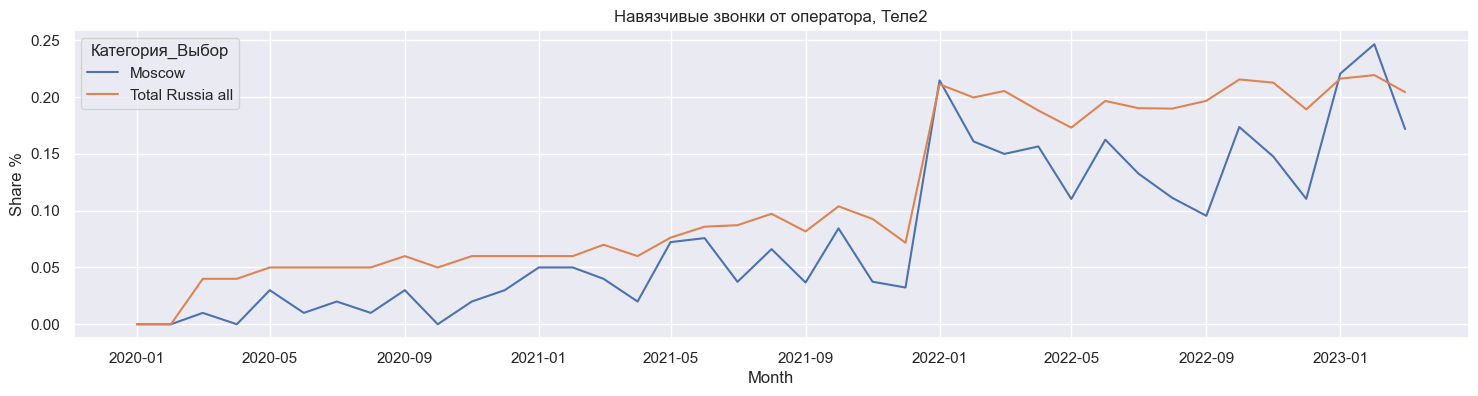

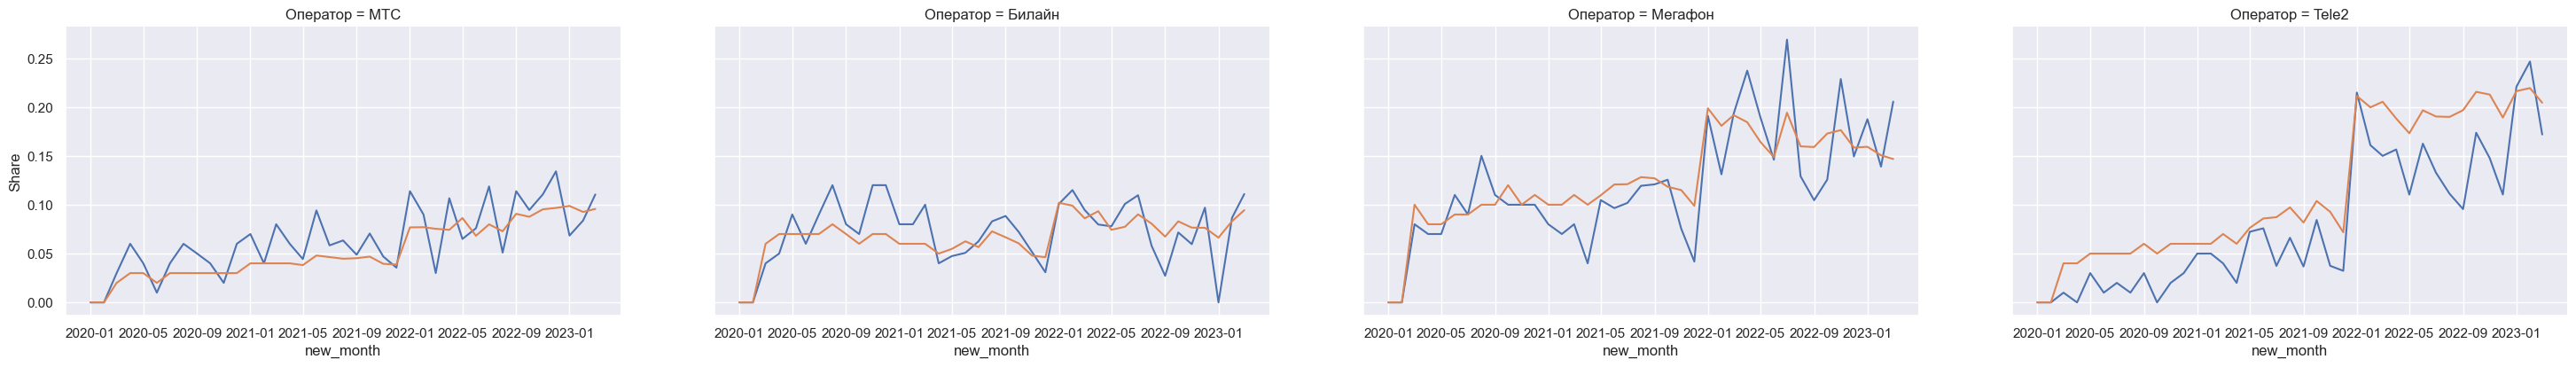

In [384]:
t= df.groupby(['new_month', 'Категория_Выбор', 'Оператор'], as_index=False).agg({'Share':'mean'}).query('Оператор == "Tele2"')
t
plt.figure(figsize = (18, 4))
plt.title("Навязчивые звонки от оператора, Теле2")
plt.xlabel('Month')
plt.ylabel('Share %')
sns.lineplot(x = 'new_month', y ='Share', hue ='Категория_Выбор',  data = t)
plt.show()
g = sns.FacetGrid (data=df, col='Оператор', col_wrap= 8 )
g. map (sns.lineplot , 'new_month' , 'Share', "Категория_Выбор" )
g.figure.set_figwidth(60)
g.figure.set_figheight(5) 
#plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='lower center', borderaxespad= 0 )


In [ ]:
avg_p = pd.read_csv('results.csv')
avg_p =  avg_p[['report_month', 'region',	'nps',	'id', 'ivdate1', 'ivdate2', 'main_operator', 'diss_reason_12']]
dic_o = {'beeline':'Билайн', 'mts':'МТС', 'tele2':'Tele2','megafon':'Мегафон'}
avg_p['main_operator']= avg_p['main_operator'].replace(dic_o)
oper = ['Tele2', 'МТС', 'Мегафон', 'Билайн']
nps_p = [1,2,3,4,5,6,7,8]
avg_p['nps'].fillna(0, inplace=True)
avg_p['id'].fillna(1, inplace=True)
avg_p['diss_reason_12'].fillna(0, inplace=True)
avg_p = avg_p.astype({'nps':"int"})
avg_p = avg_p.astype({'diss_reason_12':"int"})
avg_p['new_month'] = avg_p['report_month'] + " 01"
avg_p['new_month'] = avg_p['new_month'].str.replace(" ", "-")
avg_p['new_month'] = pd.to_datetime(avg_p['new_month']).dt.date
avg_p

In [ ]:
avg_f = avg_p.query("main_operator == @oper & diss_reason_12 == 1 & nps == @nps_p ").copy()
avg_r = avg_f.groupby(['new_month', "main_operator"], as_index=False).agg({'nps':['mean'], 'id':['count']})
avg_r.columns = ['_'.join(col).strip() for col in avg_r.columns.values]
avg_r['Категория_Выбор'] = 'Total Russia all'
avg_r

In [ ]:
avg_m = avg_f.query("region == 'Москва'").groupby(['new_month', "main_operator"], as_index=False).agg({'nps':['mean'], 'id':['count']})
avg_m.columns = ['_'.join(col).strip() for col in avg_m.columns.values]
avg_m['Категория_Выбор'] = 'Moscow'
avg_m

In [423]:
avg_tr = pd.concat([avg_r, avg_m])
df_tr = pd.merge(df, avg_tr, how= "left", left_on=['new_month', 'Оператор', 'Категория_Выбор'], right_on=['new_month_',	'main_operator_', 'Категория_Выбор'])
df_tr= df_tr[['Показатель', 'Оператор', 'Вариант', 'Категория_Выбор', 'Month', 'Share', 'new_month', 'nps_mean', 'id_count']]
df_tr['nps_mean'].fillna("no", inplace=True)
df_tr['id_count'].fillna(0, inplace=True)
df_tr

,Показатель,Оператор,Вариант,Категория_Выбор,Month,Share,new_month,nps_mean,id_count
0,Dissatisfied reasons,МТС,Навязчивые звонки от оператора с предложением ...,Moscow,Jan'20,0.000000,2020-01-01,no,0.0
1,Dissatisfied reasons,Билайн,Навязчивые звонки от оператора с предложением ...,Moscow,Jan'20,0.000000,2020-01-01,no,0.0
2,Dissatisfied reasons,Мегафон,Навязчивые звонки от оператора с предложением ...,Moscow,Jan'20,0.000000,2020-01-01,no,0.0
3,Dissatisfied reasons,Tele2,Навязчивые звонки от оператора с предложением ...,Moscow,Jan'20,0.000000,2020-01-01,no,0.0
4,Dissatisfied reasons,МТС,Навязчивые звонки от оператора с предложением ...,Total Russia all,Jan'20,0.000000,2020-01-01,no,0.0
...,...,...,...,...,...,...,...,...,...
307,Dissatisfied reasons,Tele2,Навязчивые звонки от оператора с предложением ...,Total Russia all,Mar'23,0.204380,2023-03-01,5.474074,405.0
308,Dissatisfied reasons,МТС,Навязчивые звонки от оператора с предложением ...,Moscow,Mar'23,0.110493,2023-03-01,5.727273,11.0
309,Dissatisfied reasons,Билайн,Навязчивые звонки от оператора с предложением ...,Moscow,Mar'23,0.110917,2023-03-01,6.1,10.0
310,Dissatisfied reasons,Мегафон,Навязчивые звонки от оператора с предложением ...,Moscow,Mar'23,0.205513,2023-03-01,5.214286,14.0


<AxesSubplot:title={'center':'Навязчивые звонки от оператора, Теле2'}, xlabel='Month', ylabel='Средняя оценка'>

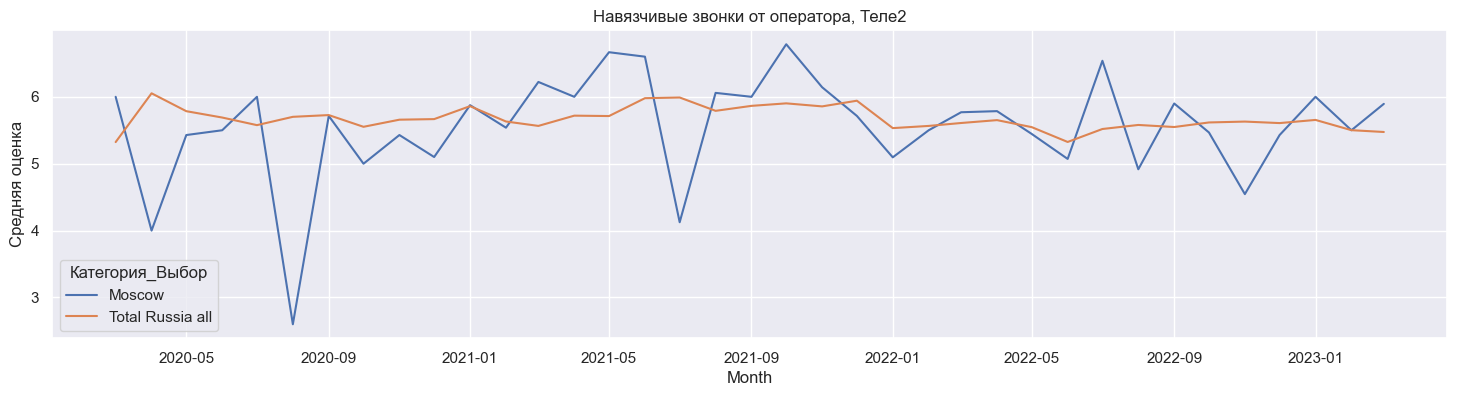

In [432]:
t1= df_tr.query('nps_mean not in ("no")').groupby(['new_month', 'Категория_Выбор', 'Оператор'], as_index=False).agg({'nps_mean':'mean'}).query('Оператор == "Tele2"')
t1
plt.figure(figsize = (18, 4))
plt.title("Навязчивые звонки от оператора, Теле2")
plt.xlabel('Month')
plt.ylabel('Средняя оценка')
sns.lineplot(x = 'new_month', y ='nps_mean', hue ='Категория_Выбор',  data = t1)


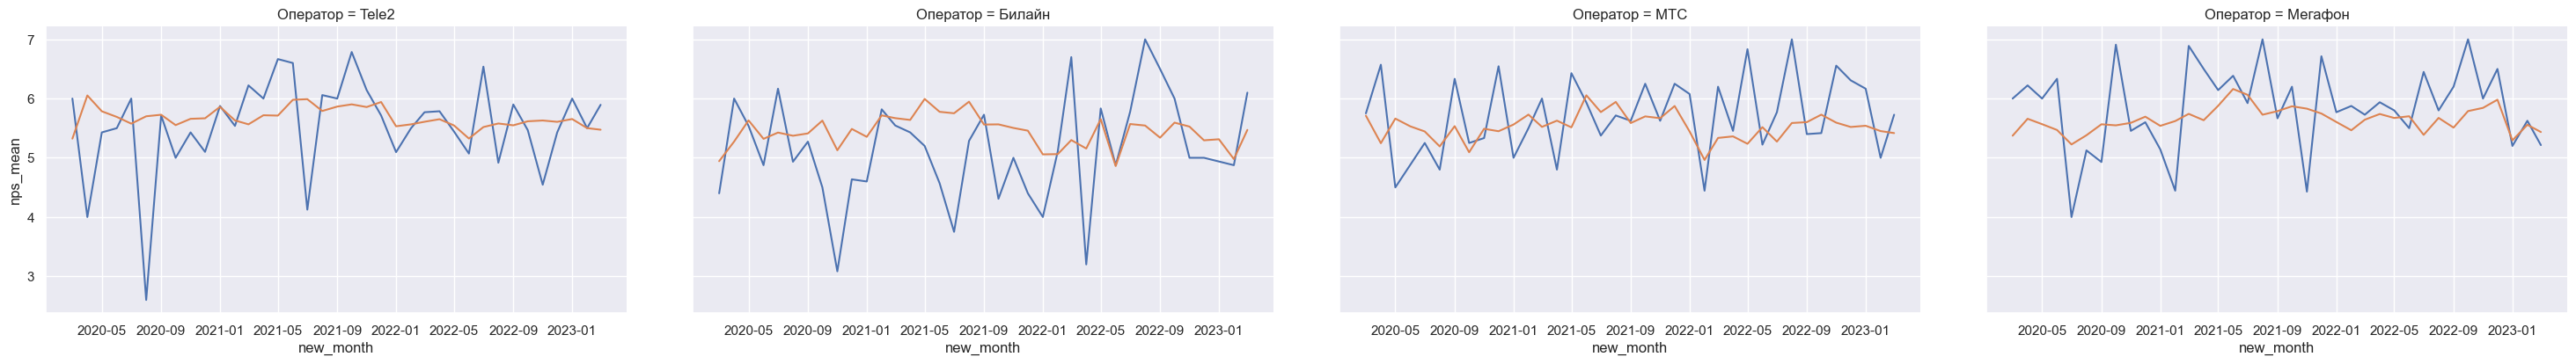

In [431]:
t1= df_tr.query('nps_mean not in ("no")').groupby(['new_month', 'Категория_Выбор', 'Оператор'], as_index=False).agg({'nps_mean':'mean'})
t1

plt.show()
g = sns.FacetGrid (data=t1, col='Оператор', col_wrap= 8 )
g. map (sns.lineplot , 'new_month' , 'nps_mean', "Категория_Выбор" )
g.figure.set_figwidth(60)
g.figure.set_figheight(5) 

In [434]:
df_tr.to_excel("fin.xlsx")

In [435]:
test = pd.read_csv('results.csv')
test

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_18928\2051113286.py:1: DtypeWarning: Columns (3,4,14,59,76,81,82,83,86) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('results.csv')


,age,region,nps,ivdate1,ivdate2,id,extid,userid,ivdur,plp,...,consideration_skylink,cp_smarts,iqp_smarts,consideration_smarts,sat_reason_mono,diss_reason_18,diss_reason_new_17,respondentid,diss_reason_19,diss_reason_20
0,55,Калининград,6.0,2023-03-01 18:51:00,2023-03-01 19:30:00,2.340318e+09,37318202.0,68829.0,2336.0,tele2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32,Петрозаводск,8.0,2023-02-27 13:13:00,2023-02-27 14:16:00,2.342730e+09,39730187.0,68829.0,3746.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48,С.Петербург,9.0,2023-02-27 11:46:00,2023-02-27 12:18:00,2.344490e+09,41489765.0,68829.0,1928.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45,Владивосток,8.0,2023-02-27 05:17:00,2023-02-27 08:29:00,2.347189e+09,44189295.0,68829.0,11551.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,Челябинск,NaN,2023-02-27 18:17:00,2023-02-27 18:26:00,2.348449e+09,45449455.0,68829.0,509.0,yota,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010775,20,Краснодар и Адыгея,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,2.018062e+10,0.0,NaN
1010776,30,Калининград,5.0,NaN,NaN,NaN,NaN,NaN,NaN,tele2,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,2.018062e+10,0.0,NaN
1010777,33,Вологда,10.0,NaN,NaN,NaN,NaN,NaN,NaN,tele2,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,2.018062e+10,NaN,NaN
1010778,54,Москва,6.0,NaN,NaN,NaN,NaN,NaN,NaN,tele2,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,2.018062e+10,1.0,Изредко сталкиваюсь с плохой зоной приёма/покр...


In [443]:
ttt = test.query("region == 'Москва' & report_month == '2020 06' ")
ttt.to_excel('asdasdasd.xlsx')